In [8]:
import numpy as np
import simpy as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [10]:
def poisson_arrivals(env, n_customers, arrival_rate, service_rate, counter, waiting_time_array):
    for i in range(n_customers):
        c = queue_time(env, counter, service_rate, waiting_time_array)
        env.process(c)
        t = np.random.exponential(1 / arrival_rate)
        yield env.timeout(t)

def queue_time(env, counter, service_rate, waiting_time_array):
    arrival_time = env.now

    with counter.request() as req:
        yield req
        waiting_time = env.now - arrival_time
        waiting_time_array.append(waiting_time)

        tib = np.random.exponential(1/ service_rate)
        yield env.timeout(tib)

In [11]:
def waiting_time_theory(lamda, mu, n):
    return lamda / (n*mu**2 - lamda*mu)

In [12]:
def simulate_queue(n_customers, arrival_rate, service_rate, n_servers, n_runs):

    wait_time_theory = waiting_time_theory(arrival_rate, service_rate, n_servers)

    E_W = []
    E_W_std = []
    for i in range(n_runs):
        np.random.seed(i)
        env = sp.Environment()

        waiting_time_array = []
        counter = sp.Resource(env, capacity=n_servers)
        env.process(poisson_arrivals(env, n_customers, arrival_rate, service_rate, counter, waiting_time_array))
        env.run()

        E_W.append(np.mean(waiting_time_array))
        E_W_std.append(np.std(waiting_time_array))

    return E_W, E_W_std, wait_time_theory


In [18]:
E_W, E_W_std, E_W_n1 = simulate_queue(100000, 1/5, 1/4.5, 1, 100)

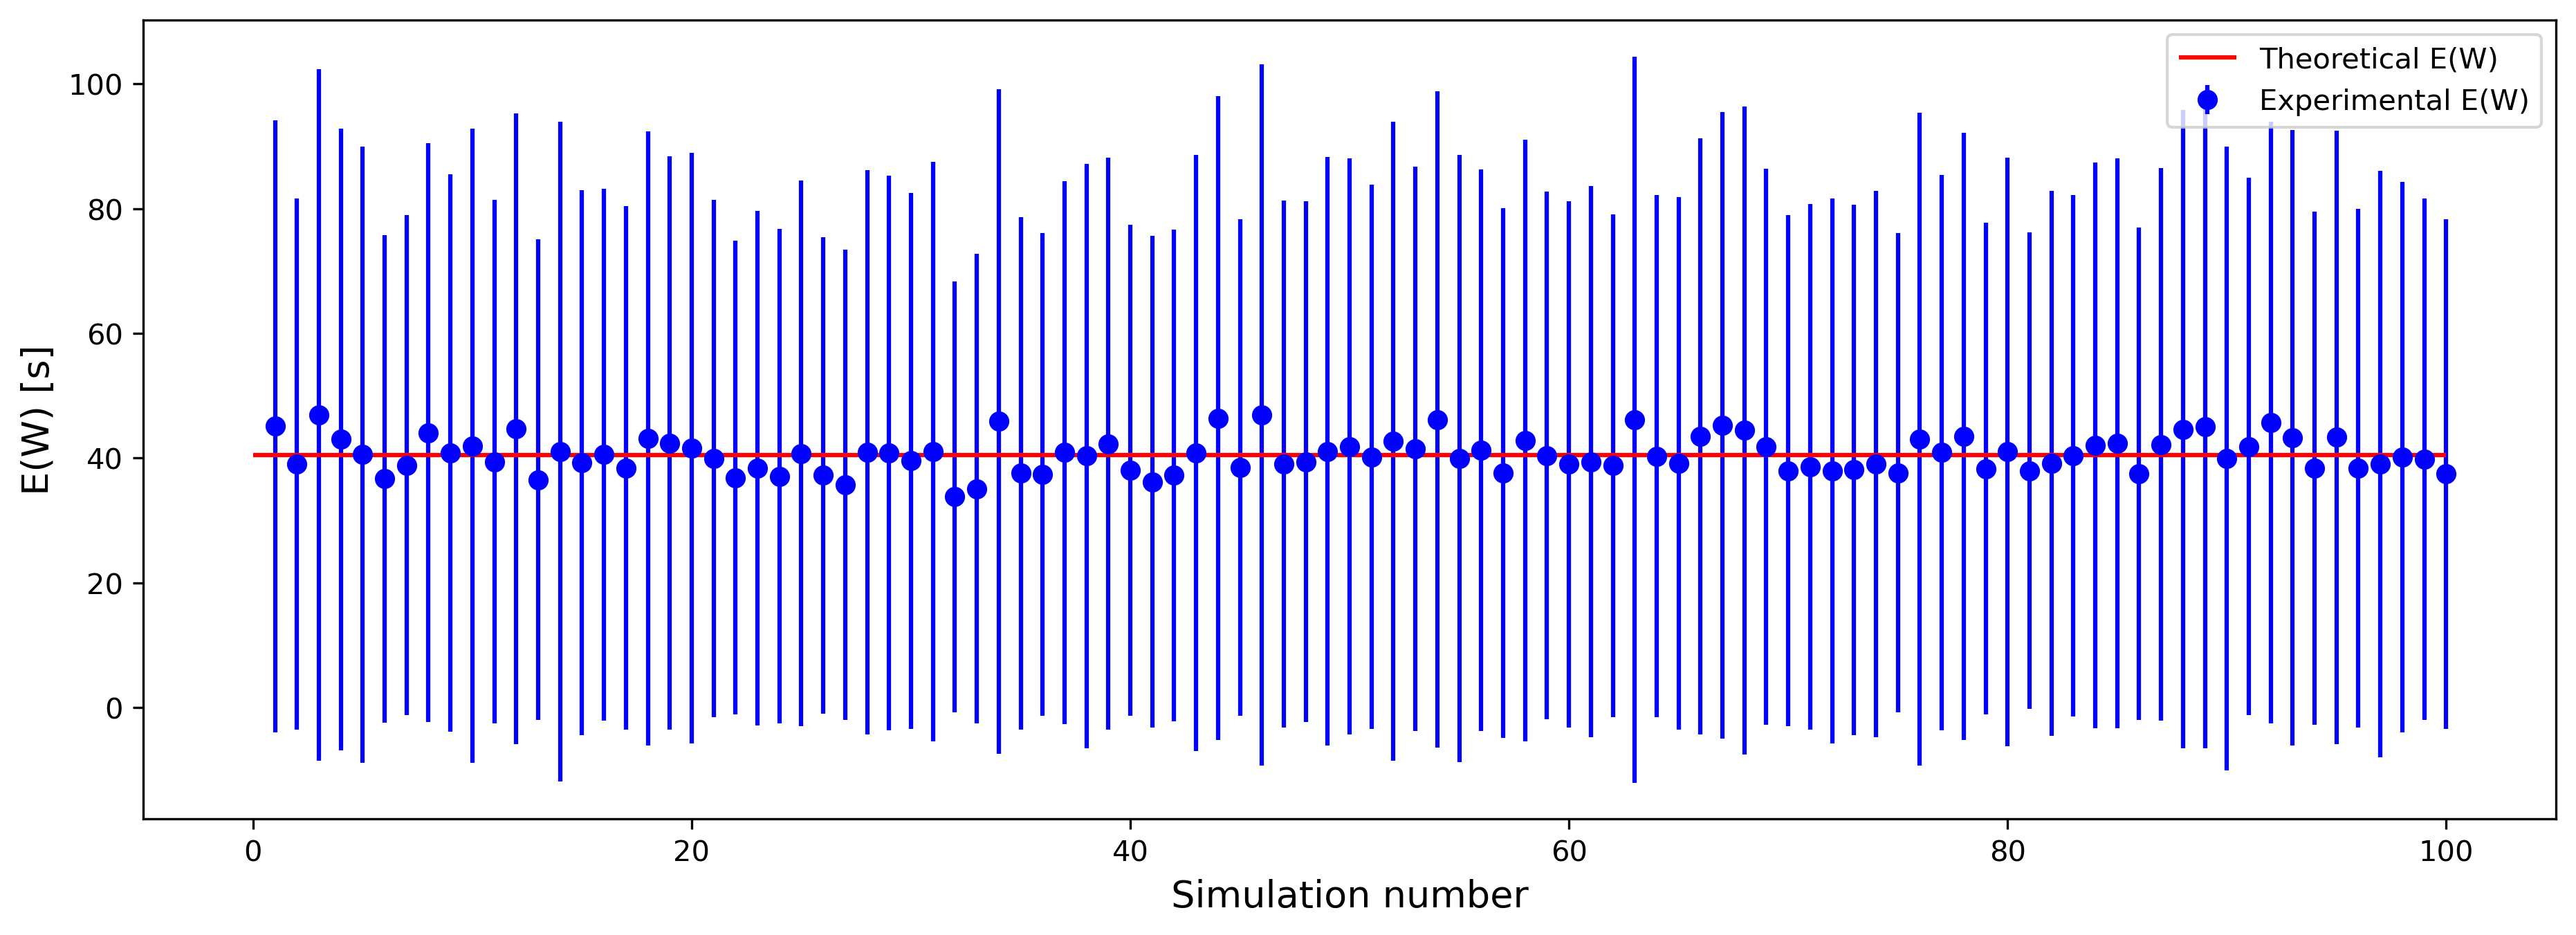

In [19]:
plt.figure(figsize=(15,5))
plt.errorbar(x=range(1, 101), y=E_W, yerr=E_W_std, fmt='o', color='blue', label='Experimental E(W)')
plt.hlines(E_W_n1, xmin=0, xmax=100, color = 'red', label='Theoretical E(W)')
plt.xlabel('Simulation number', fontsize=13)
plt.ylabel('E(W) [s]', fontsize=13)
plt.legend()
plt.show()